In [89]:
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def SetupDoors():
    # Create 3 doors and hide a prize behind one of them (True = Prize)
    doors = [False, False, False]
    prize = random.randint(0, 2)
    doors[prize] = True
    
    return doors


In [90]:
numberOfTries = 10000

In [91]:
correctGuesses = 0
correctList = []

for tries in range(numberOfTries):
    door = SetupDoors()
    guess = random.randint(0, 2)
    
    if door[guess]:
        correctGuesses += 1
        
    correctList.append(door[guess])
   
dfOneGuess = pd.DataFrame(correctList, columns=['Correct1'])   
print(f'Chose {correctGuesses} (or {correctGuesses/numberOfTries*100:.2f}%) correctly out of {numberOfTries} tries.') 
    

Chose 3318 (or 33.18%) correctly out of 10000 tries.


In [92]:
correctGuesses = 0
correctList = []

for tries in range(numberOfTries):
    door = SetupDoors()
    guess = random.randint(0, 2)
    
    # Open a door that has no prize behind it
    while True:
        openDoor = random.randint(0, 2)
        if not door[openDoor] and openDoor != guess:
            break
    
    # Change the guess to the other door
    for newGuess in range(3):
        if newGuess != guess and newGuess != openDoor:
            guess = newGuess
            break
    
    if door[guess]:
        correctGuesses += 1
        
    correctList.append(door[guess])
       
dfOneGuess['Correct2'] = correctList  
print(f'Chose {correctGuesses} (or {correctGuesses/numberOfTries*100:.2f}%) correctly out of {numberOfTries} tries.') 
    

Chose 6622 (or 66.22%) correctly out of 10000 tries.


[Text(0.5, 0, 'Guess (Wrong = False, Correct = True)'), Text(0, 0.5, 'Count')]

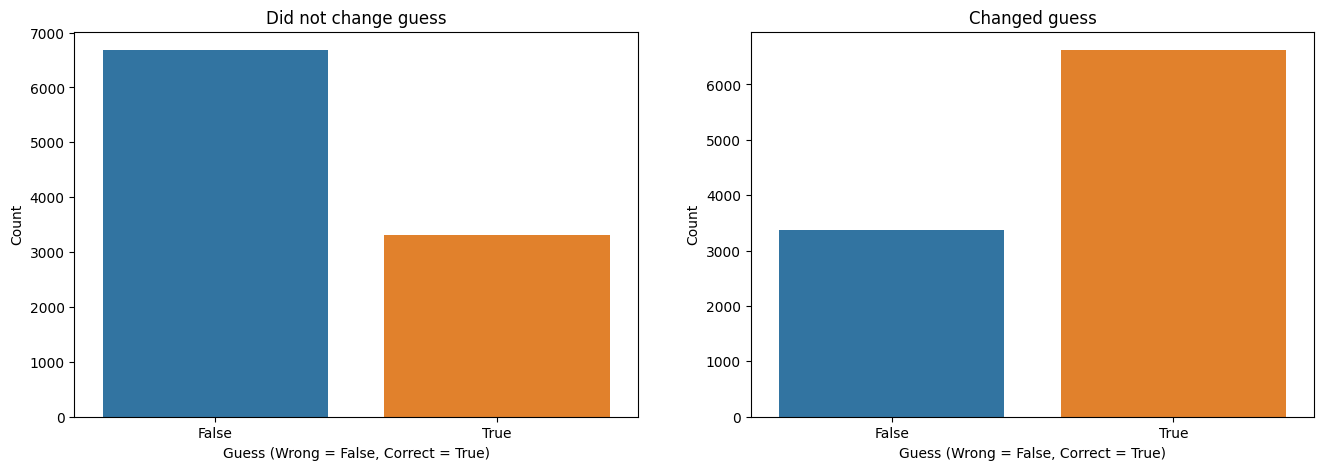

In [115]:
fig, ax =plt.subplots(1,2, figsize=(16, 5))
fig = sns.countplot(x='Correct1', data=dfOneGuess, ax = ax[0])
fig = sns.countplot(x='Correct2', data=dfOneGuess, ax = ax[1])

fig.set_title('sadfasfd')
ax[0].set_title('Did not change guess')
ax[1].set_title('Changed guess')
ax[0].set(xlabel='Guess (Wrong = False, Correct = True)', ylabel='Count')
ax[1].set(xlabel='Guess (Wrong = False, Correct = True)', ylabel='Count')